In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/EngVis_Proj/combined_trsct.csv")
df.head()

,Qty,IR,LOI,Customer Rate,Item Amount,Account Name,Respondent_Cleaned,Label
0,1000.0,88.888889,2.320037,5.46,5460.0,dcdx,Consumer,1
1,505.0,92.153285,2.499800,2.00,1010.0,"Digital Research, Inc.",Consumer,1
2,5.0,1.351351,2.817495,30.00,150.0,RTi Research,Consumer,1
3,250.0,81.967213,3.120906,5.00,1250.0,Global Strategy Group,Consumer,1
4,61.0,67.777778,3.768564,7.00,427.0,Marcus Thomas LLC,Consumer,1


In [ ]:
df.describe()

,Qty,IR,LOI,Customer Rate,Item Amount,Label
count,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000
mean,512.623673,36.311005,15.039697,17.483665,4925.859230,0.210381
std,519.731251,25.673270,5.185386,16.952384,4195.386032,0.407660
min,1.000000,0.326087,1.000000,1.000000,1.000000,0.000000
25%,125.000000,15.000000,10.392340,5.500000,1650.500000,0.000000
50%,303.000000,30.000000,15.000000,8.750000,3750.000000,0.000000
75%,750.000000,50.000000,20.000000,30.000000,7087.500000,0.000000
max,2306.000000,100.000000,33.113759,87.000000,18500.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2543 entries, 0 to 2542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Qty                 2543 non-null   float64
 1   IR                  2543 non-null   float64
 2   LOI                 2543 non-null   float64
 3   Customer Rate       2543 non-null   float64
 4   Item Amount         2543 non-null   float64
 5   Account Name        2543 non-null   object 
 6   Respondent_Cleaned  2543 non-null   object 
 7   Label               2543 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 159.1+ KB


In [ ]:
df.describe()

,Qty,IR,LOI,Customer Rate,Item Amount,Label
count,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000,2543.000000
mean,512.623673,36.311005,15.039697,17.483665,4925.859230,0.210381
std,519.731251,25.673270,5.185386,16.952384,4195.386032,0.407660
min,1.000000,0.326087,1.000000,1.000000,1.000000,0.000000
25%,125.000000,15.000000,10.392340,5.500000,1650.500000,0.000000
50%,303.000000,30.000000,15.000000,8.750000,3750.000000,0.000000
75%,750.000000,50.000000,20.000000,30.000000,7087.500000,0.000000
max,2306.000000,100.000000,33.113759,87.000000,18500.000000,1.000000


In [ ]:
print(df.shape)
df.sample(10)

(2543, 8)


,Qty,IR,LOI,Customer Rate,Item Amount,Account Name,Respondent_Cleaned,Label
1275,50.0,30.000000,15.000000,55.000000,2750.000000,"M/A/R/C Research, LLC",Consumer/B2B,0
206,1004.0,19.036784,12.022857,7.135458,7164.000000,Grey Matter Research & Consulting LLC,Consumer,1
349,1500.0,41.946309,16.573430,3.982220,5973.330078,Alter Agents,Consumer,1
1168,300.0,80.000000,15.000000,5.000000,1500.000000,Brunswick Group,Consumer,0
474,43.0,3.073624,23.545249,14.250000,612.750000,"J.D. Power and Associates, Inc.",Consumer,1
314,802.0,21.547555,15.479034,6.997818,5612.250000,"AnswerLab, LLC",Consumer,1
1289,161.0,30.000000,20.000000,43.000000,6923.000000,Illuminas Global,B2B,0
2431,400.0,60.000000,5.000000,3.750000,1500.000000,Cleveland Clinic,Consumer,0
812,275.0,15.000000,20.000000,12.000000,3300.000000,C+R Research,Consumer,0
1279,200.0,40.000000,10.000000,7.500000,1500.000000,Harris Insights & Analytics,Consumer,0


In [ ]:
df_clean = df

# **FEATURE ENGINEERING**

In [ ]:
# Time per qualified respondent
df_clean['LOI_per_IR'] = df_clean['LOI'] / df_clean['IR']

# Total interview time
df_clean['Total_Interview_Time'] = df_clean['LOI'] * df_clean['Qty']

# Revenue per interview minute
df_clean['Revenue_per_Minute'] = df_clean['Item Amount'] / df_clean['Total_Interview_Time']

# Revenue per qualified respondent
df_clean['Revenue_per_Qualified'] = df_clean['Item Amount'] / (df_clean['Qty'] * df_clean['IR'])


In [ ]:
df_clean.head()

,Account Name,Client Segment Type,Account Owner,Qty,IR,LOI,Customer Rate,Item Amount,Label,LOI_per_IR,Total_Interview_Time,Revenue_per_Minute,Revenue_per_Qualified
1,AMC Global,One Stop Shopper,Courtney Hocking,21.0,84.000000,1.212958,89.285714,1875.0,1,0.014440,25.472124,73.609880,1.062925
3,dcdx,One Stop Shopper,Courtney Hocking,1000.0,88.888889,2.320037,5.460000,5460.0,1,0.026100,2320.036869,2.353411,0.061425
4,"Digital Research, Inc.",One Stop Shopper,Whitney Giordano,505.0,92.153285,2.499800,2.000000,1010.0,1,0.027127,1262.399013,0.800064,0.021703
5,RTi Research,Blender,Whitney Giordano,5.0,1.351351,2.817495,30.000000,150.0,1,2.084946,14.087475,10.647756,22.200000
7,Marcus Thomas LLC,Automater,Courtney Hocking,61.0,67.777778,3.768564,7.000000,427.0,1,0.055602,229.882405,1.857471,0.103279


# **LOG REGRESSION MODEL IMPLEMENTATION**

## How the code works:

1. **Preprocessing and One‑Hot Encoding**  
   - **Assumption:** You have a cleaned dataset (called `df_clean`) that contains the columns:  
     - **Customer Rate:** The price you charge.  
     - **Qty:** The number of units sold.  
     - **IR:** Incidence Rate (e.g., percentage or count of qualified respondents).  
     - **LOI:** Length of Interview.  
     - **Label:** A binary outcome indicating whether a bid was accepted (1) or rejected (0).  
     - **Client Segment Type:** A categorical variable that classifies clients.  
   - **What We Do:**  
     - We use `pd.get_dummies()` to convert the “Client Segment Type” into several binary (0/1) columns. Each category gets its own column.
     - We then define our features (`X`) to include our four numerical columns plus these new binary columns. The target variable (`y`) is the “Label.”

2. **Train-Test Split and Scaling**  
   - **Assumption:** For machine learning models to perform well, numerical features should be scaled.  
   - **What We Do:**  
     - The data is split into a training set (70%) and a testing set (30%) so that we can later evaluate model performance on unseen data.
     - We use `StandardScaler` to transform the numerical features (“Customer Rate”, “Qty”, “IR”, “LOI”) to have a mean of 0 and standard deviation of 1.
     - The scaled values then replace the original numerical values in our training and testing data.

3. **Training the Logistic Regression Model**  
   - **Assumption:** We are using logistic regression to predict whether a bid is accepted.  
   - **What We Do:**  
     - We train a logistic regression model using the scaled training data. The model learns how the features relate to the bid acceptance (the “Label”).

4. **Computing Representative Values (Quantiles)**  
   - **Assumption:** The variables IR, LOI, and Qty have a range of values, and we want to define what counts as “low,” “medium,” and “high.”
   - **What We Do:**  
     - We create a helper function (`get_quantiles`) that calculates the 25th percentile (low), 50th percentile (medium), and 75th percentile (high) for any given feature.
     - We then compute these quantiles for IR, LOI, and Qty using the overall data. This helps us later simulate different scenarios.

5. **Setting Up the Simulation Grid**  
   - **Assumption:** We want to see how expected revenue and bid acceptance probability change over a range of customer rate (price) values.
   - **What We Do:**  
     - We define a range of customer rate values (from the minimum to the maximum found in the data) and split this range into 100 evenly spaced values.
     - We also define two helper functions:  
       - `simulate_predictions`: Builds a simulation DataFrame where we fix IR, LOI, and Qty at specific values (like the median or another quantile) and add in the segment dummy values. It ensures the DataFrame columns are ordered the same way as the model expects.  
       - `predict_and_compute`: Scales the numerical columns of the simulation DataFrame, predicts the bid acceptance probability using the trained model, and computes the expected revenue by multiplying the customer rate, quantity, and predicted probability.

6. **Simulation for Overall Data**  
   - **Assumption:** For an overall view, we use the median values (50th percentile) for IR, LOI, and Qty, and we ignore any client-specific effect (i.e., we set the segment dummy to 0).
   - **What We Do:**  
     - We generate a simulation DataFrame using the customer rate range and the median values for IR, LOI, and Qty.
     - We then run our prediction function on this DataFrame to obtain the predicted bid acceptance probabilities and expected revenue for each customer rate.

7. **Simulation by Client Segment Type**  
   - **Assumption:** Different client segments might behave differently, so we want to simulate predictions for each segment separately.
   - **What We Do:**  
     - We loop through each unique client segment in the data.
     - For each segment, we filter the data to compute the segment-specific median (or other quantile) values for IR, LOI, and Qty.
     - We create a “dummy” dictionary that marks the current segment (e.g., setting the one‑hot column for that segment to 1).
     - Using these segment-specific values, we generate a simulation DataFrame and compute the predicted bid acceptance probability and expected revenue.
     - We save these simulation results for later visualization.

8. **Visualization**  
   - **What We Do:**  
     - First, we create a set of plots for the overall data. One subplot shows Expected Revenue vs. Customer Rate, and another shows Bid Acceptance Probability vs. Customer Rate.
     - Next, we create similar plots broken out by client segment. For each segment, we plot the simulation results (again, one subplot for expected revenue and one for acceptance probability) using the segment-specific simulations.
     - Each plot is clearly labeled with axis labels, titles, and legends so you can easily see how pricing affects revenue and acceptance probability both overall and for each client segment.

In summary, the code takes the cleaned dataset, transforms it (including scaling and one‑hot encoding), trains a logistic regression model to predict bid acceptance, and then uses that model to simulate how different pricing strategies (across a range of customer rate values) impact expected revenue and acceptance probability. It does this both for the overall dataset and separately for each client segment, providing visualizations that help you understand how to optimize pricing for the highest revenue and best bid acceptance.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# ---------------------------
# 1. Preprocessing and One-Hot Encoding
# ---------------------------
# One-hot encode "Client Segment Type"
df_encoded = pd.get_dummies(df_clean, columns=['Client Segment Type'], drop_first=False)

# Define the features to use.
# Including our numerical features and all the one-hot encoded columns.
# Get one-hot encoded columns list (they start with 'Client Segment Type_')
segment_cols = [col for col in df_encoded.columns if col.startswith('Client Segment Type')]
feature_cols = ['Customer Rate', 'Qty', 'IR', 'LOI'] + segment_cols
target = 'Label'

# Create feature matrix X and target vector y
X = df_encoded[feature_cols]
y = df_encoded[target]



In [ ]:
# ---------------------------
# 2. Train-Test Split and Scaling
# ---------------------------
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# We will scale only the numerical columns: 'Customer Rate', 'Qty', 'IR', 'LOI'
num_cols = ['Customer Rate', 'Qty', 'IR', 'LOI']

scaler = StandardScaler()
# Fit scaler on training numerical features
X_train_scaled_num = scaler.fit_transform(X_train[num_cols])
X_test_scaled_num = scaler.transform(X_test[num_cols])

# Replace numerical features in X_train and X_test with the scaled values
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[num_cols] = X_train_scaled_num
X_test_scaled[num_cols] = X_test_scaled_num


In [ ]:

# ---------------------------
# 3. Train a Logistic Regression Model
# ---------------------------
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

# ---------------------------
# 4. Compute Representative Values (Quantiles)
# ---------------------------
# Overall quantiles for IR, LOI, and Qty using the original data (or training data)
def get_quantiles(series):
    return {
        'low': series.quantile(0.25),
        'medium': series.quantile(0.50),
        'high': series.quantile(0.75)
    }

overall_IR = get_quantiles(df_clean['IR'])
overall_LOI = get_quantiles(df_clean['LOI'])
overall_Qty = get_quantiles(df_clean['Qty'])

print("Overall IR quantiles:", overall_IR)
print("Overall LOI quantiles:", overall_LOI)
print("Overall Qty quantiles:", overall_Qty)

Overall IR quantiles: {'low': np.float64(15.0), 'medium': np.float64(30.0), 'high': np.float64(50.0)}
Overall LOI quantiles: {'low': np.float64(11.139836981892586), 'medium': np.float64(15.0), 'high': np.float64(20.0)}
Overall Qty quantiles: {'low': np.float64(110.0), 'medium': np.float64(300.0), 'high': np.float64(750.0)}


In [ ]:

# ---------------------------
# 5. Simulation Grid Setup
# ---------------------------
# Define a range of Customer Rate values for simulation
cr_min = df_clean['Customer Rate'].min()
cr_max = df_clean['Customer Rate'].max()
customer_rate_range = np.linspace(cr_min, cr_max, 100)

# Function to simulate predictions given fixed values for IR, LOI, Qty, and client segment dummy values
def simulate_predictions(customer_rate_vals, ir_val, loi_val, qty_val, segment_dummy):
    # Build a DataFrame for simulation
    sim_df = pd.DataFrame({'Customer Rate': customer_rate_vals})
    sim_df['IR'] = ir_val
    sim_df['LOI'] = loi_val
    sim_df['Qty'] = qty_val
    # For each one-hot encoded segment column, assign the value provided in segment_dummy
    for col in segment_cols:
        sim_df[col] = segment_dummy.get(col, 0)
    # Reorder columns to match training data
    sim_df = sim_df[["Customer Rate", "Qty", "IR", "LOI"] + segment_cols]
    return sim_df


# Prepare a function to make predictions and compute expected revenue
def predict_and_compute(sim_df, scaler, model):
    # Scale numerical columns
    sim_df_scaled = sim_df.copy()
    sim_df_scaled[num_cols] = scaler.transform(sim_df[num_cols])
    # Predict acceptance probability
    prob = model.predict_proba(sim_df_scaled)[:, 1]
    sim_df['Acceptance_Prob'] = prob
    # Calculate expected revenue (Customer Rate * Qty * predicted probability)
    sim_df['Expected_Revenue'] = sim_df['Customer Rate'] * sim_df['Qty'] * prob
    return sim_df

In [ ]:
# ---------------------------
# 6. Simulation for Overall Data (using median values)
# ---------------------------
overall_sim = simulate_predictions(
    customer_rate_vals=customer_rate_range,
    ir_val=overall_IR['medium'],
    loi_val=overall_LOI['medium'],
    qty_val=overall_Qty['medium'],
    segment_dummy={col: 0 for col in segment_cols}  # overall: no specific segment effect
)
overall_sim = predict_and_compute(overall_sim, scaler, lr)



In [ ]:
# ---------------------------
# 7. Simulation by Client Segment Type
# ---------------------------
# We'll loop through each client segment present in the one-hot columns.
# For each segment, we will compute the segment-specific median (or other quantile) values for IR, LOI, and Qty.
segment_sims = {}
unique_segments = df_clean['Client Segment Type'].unique()
for seg in unique_segments:
    # Filter original data for this segment
    seg_df = df_clean[df_clean['Client Segment Type'] == seg]
    seg_IR = get_quantiles(seg_df['IR'])
    seg_LOI = get_quantiles(seg_df['LOI'])
    seg_Qty = get_quantiles(seg_df['Qty'])

    # Build segment dummy: set the one-hot column for this segment to 1, others to 0.
    seg_dummy = {col: 0 for col in segment_cols}
    seg_dummy[f'Client Segment Type_{seg}'] = 1  # note: column name from get_dummies
    # If get_dummies did not add a prefix, adjust accordingly.

    seg_sim = simulate_predictions(
        customer_rate_vals=customer_rate_range,
        ir_val=seg_IR['medium'],
        loi_val=seg_LOI['medium'],
        qty_val=seg_Qty['medium'],
        segment_dummy=seg_dummy
    )
    seg_sim = predict_and_compute(seg_sim, scaler, lr)
    segment_sims[seg] = seg_sim


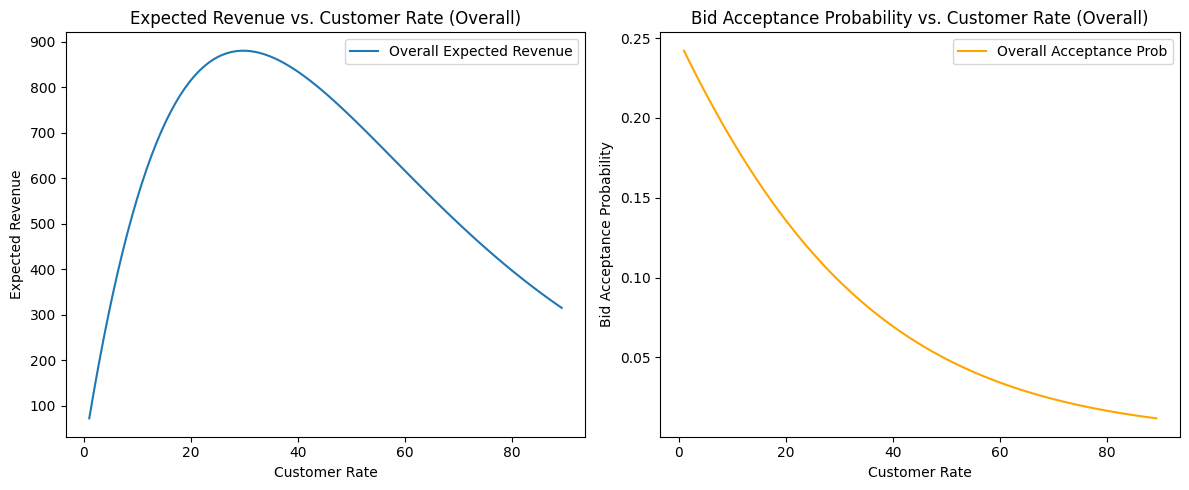

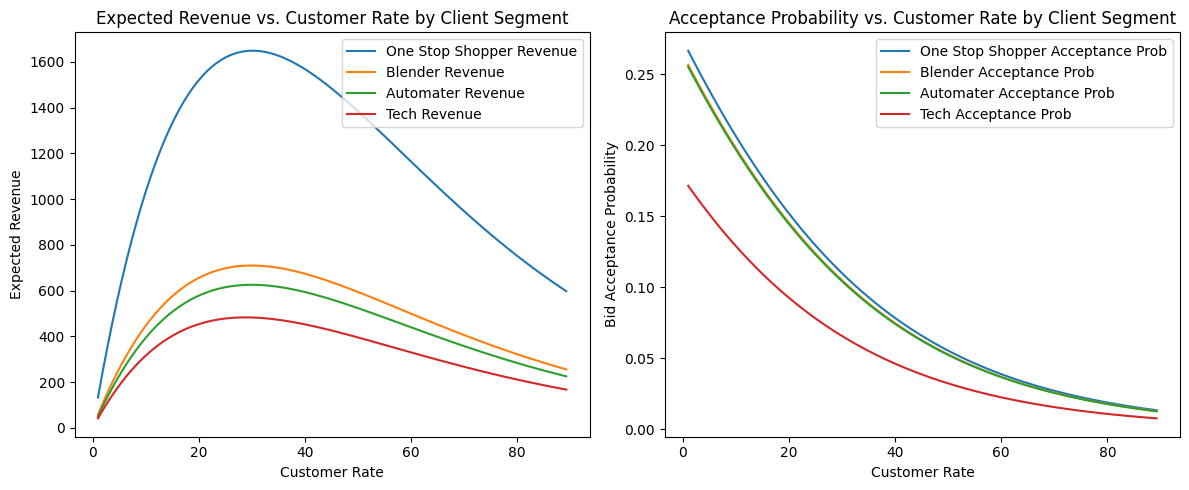

In [ ]:
# ---------------------------
# 8. Visualization
# ---------------------------
# Plot Overall Expected Revenue and Acceptance Probability vs Customer Rate
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(overall_sim['Customer Rate'], overall_sim['Expected_Revenue'], label='Overall Expected Revenue')
plt.xlabel('Customer Rate')
plt.ylabel('Expected Revenue')
plt.title('Expected Revenue vs. Customer Rate (Overall)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(overall_sim['Customer Rate'], overall_sim['Acceptance_Prob'], label='Overall Acceptance Prob', color='orange')
plt.xlabel('Customer Rate')
plt.ylabel('Bid Acceptance Probability')
plt.title('Bid Acceptance Probability vs. Customer Rate (Overall)')
plt.legend()
plt.tight_layout()
plt.show()

# Plot by Client Segment Type
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for seg, sim in segment_sims.items():
    plt.plot(sim['Customer Rate'], sim['Expected_Revenue'], label=f'{seg} Revenue')
plt.xlabel('Customer Rate')
plt.ylabel('Expected Revenue')
plt.title('Expected Revenue vs. Customer Rate by Client Segment')
plt.legend()

plt.subplot(1, 2, 2)
for seg, sim in segment_sims.items():
    plt.plot(sim['Customer Rate'], sim['Acceptance_Prob'], label=f'{seg} Acceptance Prob')
plt.xlabel('Customer Rate')
plt.ylabel('Bid Acceptance Probability')
plt.title('Acceptance Probability vs. Customer Rate by Client Segment')
plt.legend()

plt.tight_layout()
plt.show()


**Top-Left: “Expected Revenue vs. Customer Rate (Overall)”**  
- This curve shows how expected revenue changes as you adjust the customer rate (price) across all data (no segment breakdown).  
- At lower rates, increasing the price boosts revenue because the probability of acceptance isn’t dropping too quickly.  
- Past a certain point, higher prices cause the acceptance probability to fall enough that revenue declines, creating a peak where expected revenue is maximized.

**Top-Right: “Bid Acceptance Probability vs. Customer Rate (Overall)”**  
- This line illustrates how likely a bid is to be accepted as you change the customer rate for the overall dataset.  
- As price increases, acceptance probability decreases, reflecting that higher prices can deter potential buyers.

**Bottom-Left: “Expected Revenue vs. Customer Rate by Client Segment”**  
- Each colored line represents a different client segment’s expected revenue curve as the price changes.  
- You can see that different segments peak at different rates, suggesting some clients are more sensitive to price than others.  
- Identifying where each line reaches its maximum helps you find the optimal rate for each segment.

**Bottom-Right: “Acceptance Probability vs. Customer Rate by Client Segment”**  
- Each line corresponds to a different client segment’s likelihood of accepting a bid at various price points.  
- All lines slope downward, but at different rates, showing that some segments are more (or less) sensitive to price changes than others.

# **VISUALIZING SEGMENTS**

Here's an overview in plain language of what the code does, step by step:

1. **Setup and Helper Functions:**  
   - **Assumptions:**  
     The code assumes that there is a trained logistic regression model (`lr`), a `StandardScaler` (`scaler`) that was fitted on the numerical features, and one‑hot encoded columns for "Client Segment Type" (stored in `segment_cols`).  
   - **Helper Functions:**  
     - **simulate_predictions:**  
       This function creates a new DataFrame for simulation. You provide a range of "Customer Rate" values and fixed values for IR, LOI, and Qty (for example, the median value or a specific quantile). It also adds the segment dummy values (which indicate which client segment is being simulated) and arranges the columns in the same order as in the training data.  
     - **predict_and_compute:**  
       This function takes the simulated DataFrame, scales the numerical features using the `scaler`, and then uses the trained logistic regression model to predict the bid acceptance probability. It then calculates the expected revenue by multiplying the customer rate, quantity, and the predicted acceptance probability.

2. **Defining Simulation Scenarios:**  
   - The code defines six different scenarios in a dictionary called `scenarios`. Each scenario specifies a combination of quantile levels for IR, LOI, and Qty (e.g., "medium IR, low LOI, low Qty" for Scenario 1, "high IR, medium LOI, high Qty" for Scenario 2, etc.).  
   - A helper function `get_quantiles` is used to compute the 25th, 50th, and 75th percentiles for a given feature. This provides the "low", "medium", and "high" values.

3. **Setting Up the Simulation Grid:**  
   - The code defines a range of possible customer rates (from the minimum to the maximum observed in the data) and splits it into 100 evenly spaced values. This range will be used to see how expected revenue and bid acceptance change as the customer rate is varied.

4. **Simulation by Client Segment:**  
   - The code loops through each unique client segment in the dataset. For each segment:
     - It filters the original data to get only the records for that segment.
     - It calculates segment‑specific quantiles for IR, LOI, and Qty. This means each client segment can have its own “low,” “medium,” and “high” values based on its own data.
     - It builds a “dummy” variable (a dictionary) to indicate which client segment is being simulated (by setting the corresponding one‑hot encoded column to 1).
     - Then, for each of the six predefined scenarios, it:
       - Retrieves the appropriate quantile values for IR, LOI, and Qty for that segment.
       - Uses `simulate_predictions` to create a simulation DataFrame where the customer rate varies over the defined range, while IR, LOI, and Qty are fixed at the scenario’s values.
       - Calls `predict_and_compute` to get predictions (bid acceptance probability) and compute the expected revenue for every customer rate in that simulation.
       - Finds the optimal point in that scenario—the customer rate that yields the maximum expected revenue—and stores the optimal customer rate, the maximum revenue, and the corresponding acceptance probability.

5. **Visualization:**  
   - For each client segment, the code generates a figure with two subplots:
     - **Left Subplot (Expected Revenue vs. Customer Rate):**  
       Each of the six scenarios is plotted as a separate line showing how expected revenue changes with customer rate. The optimal point (where revenue is highest) for each scenario is marked with a red dot and annotated with the customer rate, maximum revenue, and acceptance probability.
     - **Right Subplot (Bid Acceptance Probability vs. Customer Rate):**  
       Similarly, each scenario is plotted to show how bid acceptance probability changes with customer rate. The optimal points are marked and annotated here as well.
     
   - These visualizations allow the comerison of how different pricing strategies (under different assumed conditions for IR, LOI, and Qty) affect both revenue and acceptance probability for each client segment. This is useful to determine the best pricing strategy for each segment.

In summary, the code simulates how expected revenue and bid acceptance probability change as the customer rate varys, using six different sets of conditions (scenarios) based on quantile values. It does this separately for each client segment, then visualizes the results so you can see, for each segment, which pricing strategy (customer rate) leads to the highest expected revenue and what the corresponding bid acceptance probability is.

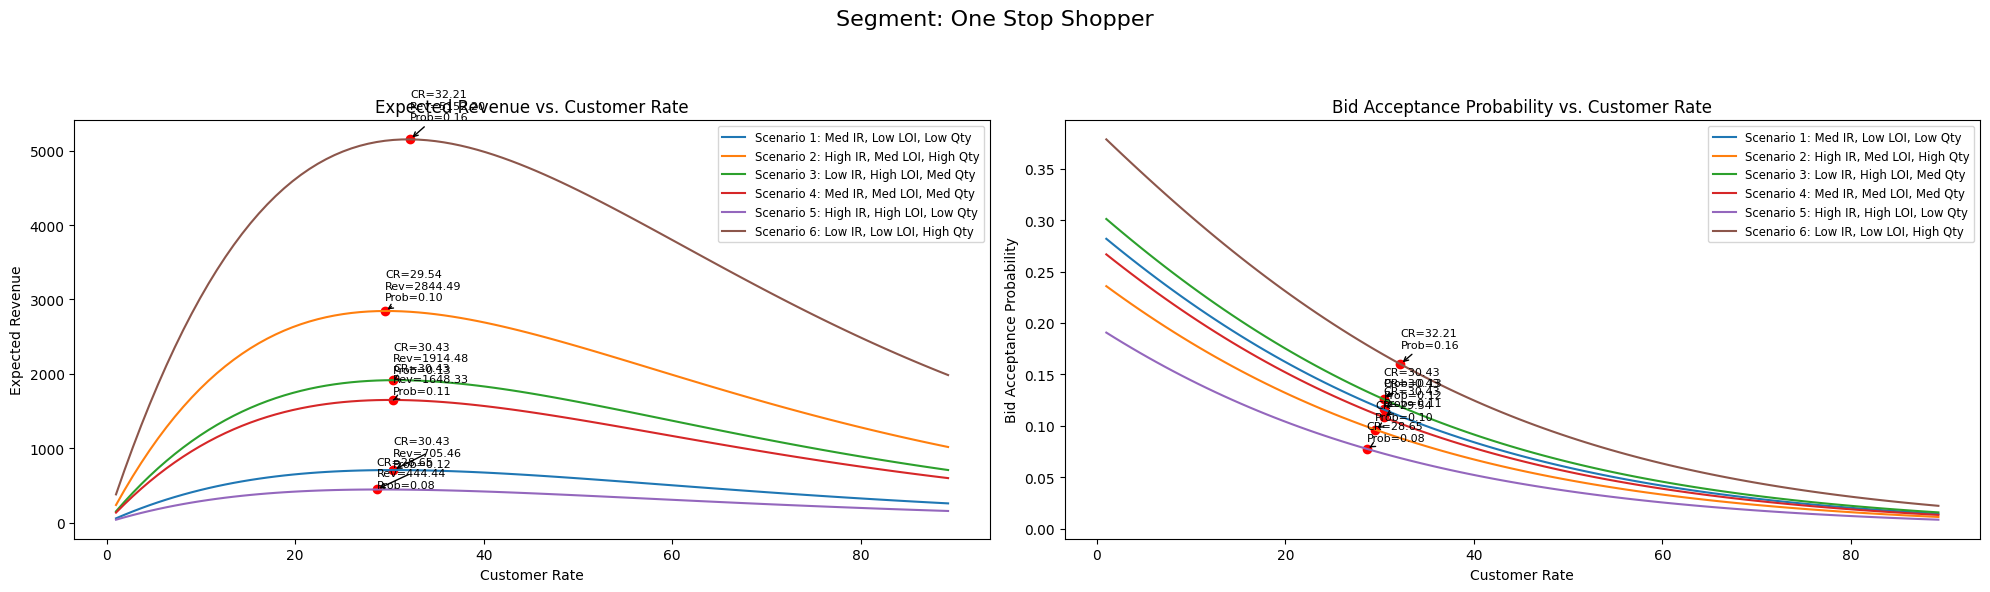

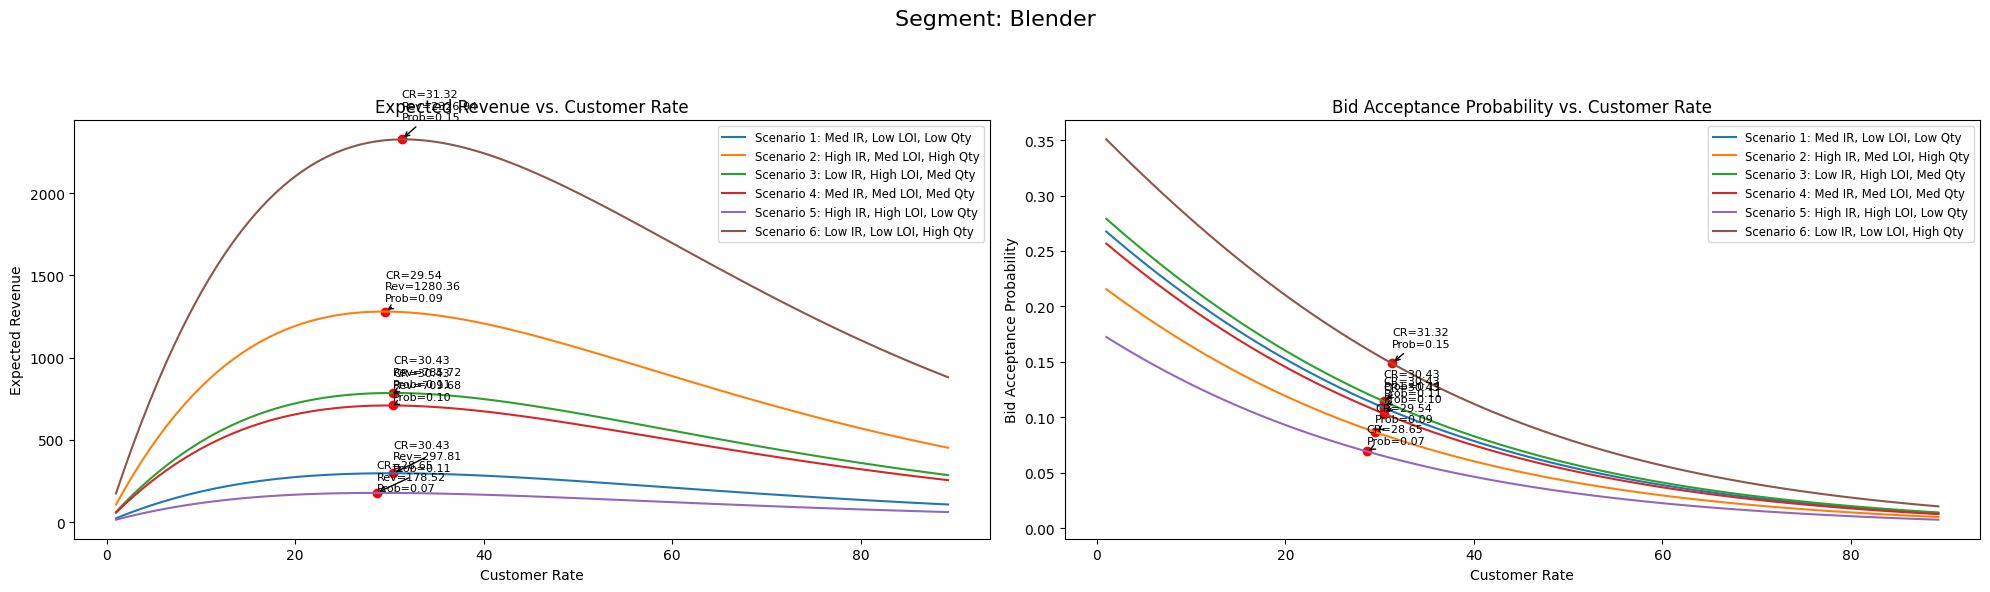

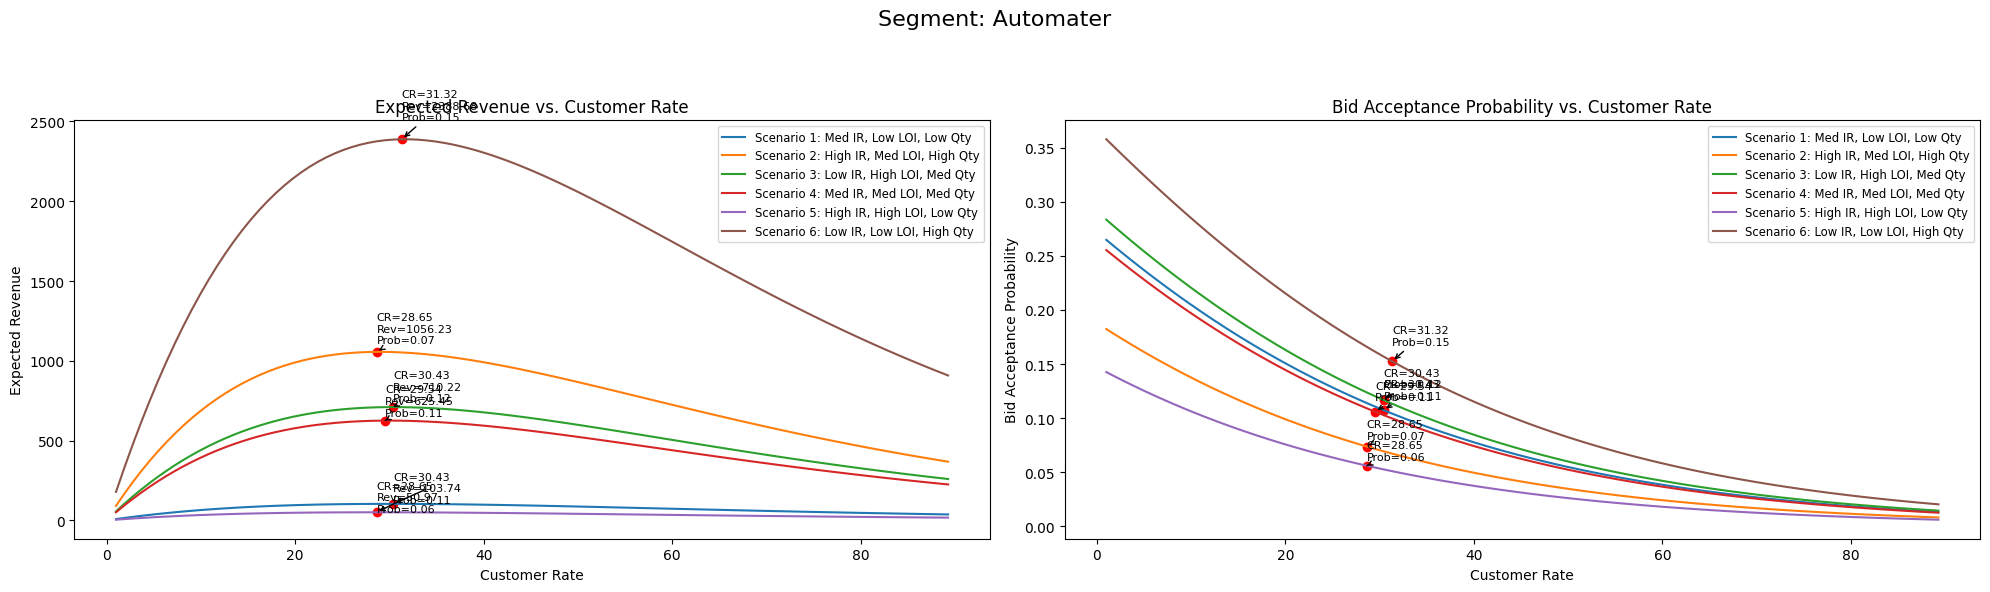

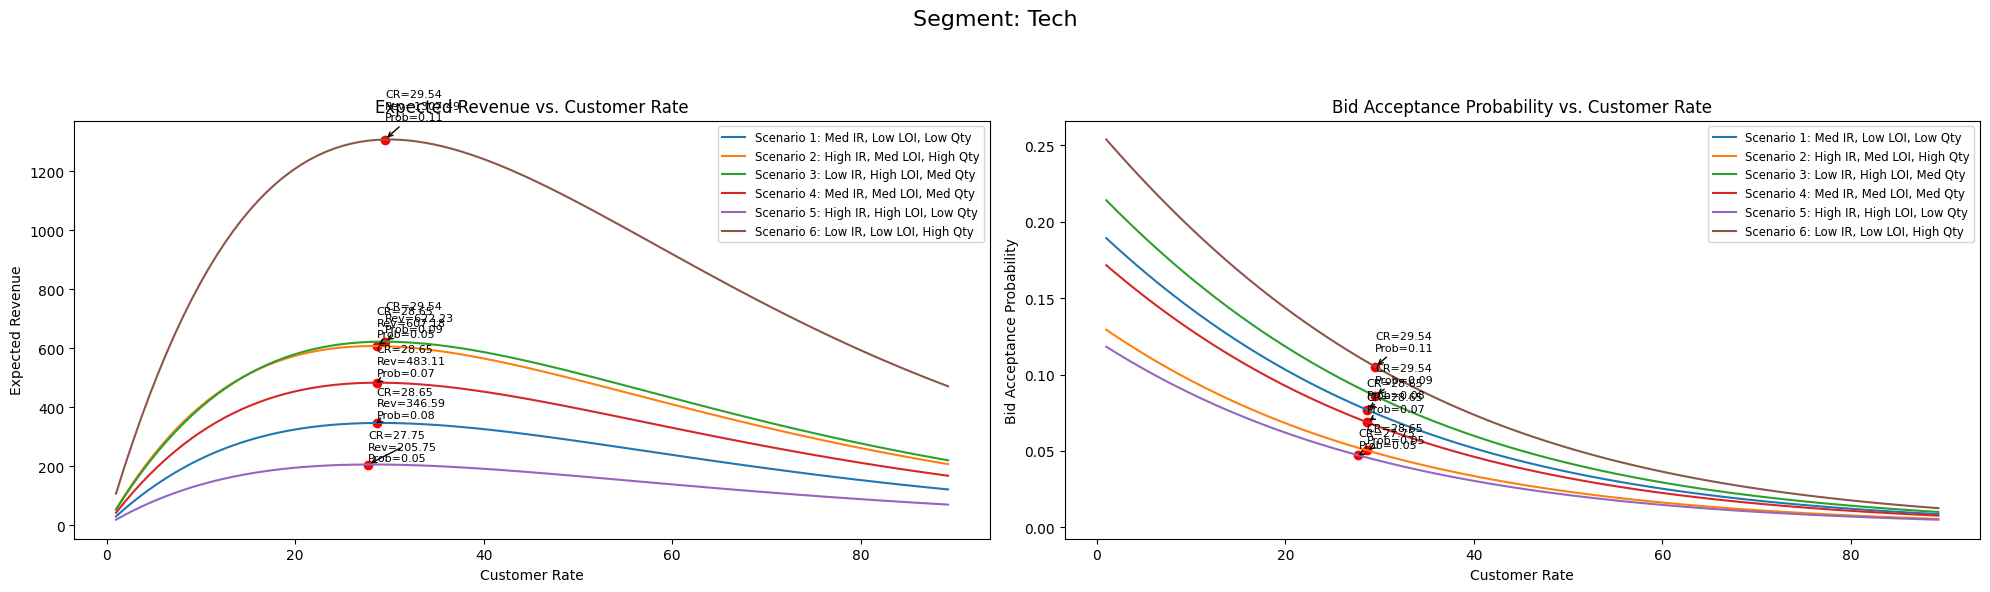

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Assumptions ---
# scaler: a StandardScaler fitted on the numerical features ['Customer Rate', 'Qty', 'IR', 'LOI']
# lr: the trained logistic regression model
# segment_cols: list of one-hot encoded column names for "Client Segment Type" (e.g., from pd.get_dummies)

# The following functions should be defined as in previous code:
def simulate_predictions(customer_rate_vals, ir_val, loi_val, qty_val, segment_dummy):
    # Build a DataFrame for simulation
    sim_df = pd.DataFrame({'Customer Rate': customer_rate_vals})
    sim_df['IR'] = ir_val
    sim_df['LOI'] = loi_val
    sim_df['Qty'] = qty_val
    for col in segment_cols:
        sim_df[col] = segment_dummy.get(col, 0)
    # Ensure the column order matches training
    sim_df = sim_df[["Customer Rate", "Qty", "IR", "LOI"] + segment_cols]
    return sim_df

def predict_and_compute(sim_df, scaler, model):
    sim_df_scaled = sim_df.copy()
    sim_df_scaled[num_cols] = scaler.transform(sim_df[num_cols])
    prob = model.predict_proba(sim_df_scaled)[:, 1]
    sim_df['Acceptance_Prob'] = prob
    sim_df['Expected_Revenue'] = sim_df['Customer Rate'] * sim_df['Qty'] * prob
    return sim_df

# List of numerical columns used in training:
num_cols = ['Customer Rate', 'Qty', 'IR', 'LOI']

# --- Define 6 simulation scenarios ---
scenarios = {
    "Scenario 1: Med IR, Low LOI, Low Qty": {"IR": "medium", "LOI": "low", "Qty": "low"},
    "Scenario 2: High IR, Med LOI, High Qty": {"IR": "high", "LOI": "medium", "Qty": "high"},
    "Scenario 3: Low IR, High LOI, Med Qty": {"IR": "low", "LOI": "high", "Qty": "medium"},
    "Scenario 4: Med IR, Med LOI, Med Qty": {"IR": "medium", "LOI": "medium", "Qty": "medium"},
    "Scenario 5: High IR, High LOI, Low Qty": {"IR": "high", "LOI": "high", "Qty": "low"},
    "Scenario 6: Low IR, Low LOI, High Qty": {"IR": "low", "LOI": "low", "Qty": "high"}
}

# Function to get quantiles for a series
def get_quantiles(series):
    return {
        'low': series.quantile(0.25),
        'medium': series.quantile(0.50),
        'high': series.quantile(0.75)
    }

# Define range for Customer Rate simulation
cr_min = df_clean['Customer Rate'].min()
cr_max = df_clean['Customer Rate'].max()
customer_rate_range = np.linspace(cr_min, cr_max, 100)

# Get unique segments from the original data
unique_segments = df_clean['Client Segment Type'].unique()

# For each client segment, create visualizations for the six scenarios
for seg in unique_segments:
    # Filter data for the segment and compute segment-specific quantiles for IR, LOI, Qty
    seg_df = df_clean[df_clean['Client Segment Type'] == seg]
    seg_quantiles_IR = get_quantiles(seg_df['IR'])
    seg_quantiles_LOI = get_quantiles(seg_df['LOI'])
    seg_quantiles_Qty = get_quantiles(seg_df['Qty'])

    # Build dummy for the segment (one-hot encoded columns)
    seg_dummy = {col: 0 for col in segment_cols}
    seg_dummy[f'Client Segment Type_{seg}'] = 1  # Adjust if needed based on dummies

    # Dictionary to store simulation results for each scenario for this segment
    scenario_results = {}
    optimal_points = {}  # To store optimum points per scenario

    for scenario_name, scenario in scenarios.items():
        # Get the segment-specific quantile values for this scenario
        ir_val = seg_quantiles_IR[scenario["IR"]]
        loi_val = seg_quantiles_LOI[scenario["LOI"]]
        qty_val = seg_quantiles_Qty[scenario["Qty"]]

        # Generate simulation DataFrame and compute predictions
        sim_df = simulate_predictions(customer_rate_range, ir_val, loi_val, qty_val, seg_dummy)
        sim_df = predict_and_compute(sim_df, scaler, lr)
        scenario_results[scenario_name] = sim_df

        # Find optimal (max expected revenue) point for this scenario
        max_idx = sim_df['Expected_Revenue'].idxmax()
        opt_cr = sim_df.loc[max_idx, 'Customer Rate']
        max_rev = sim_df.loc[max_idx, 'Expected_Revenue']
        opt_prob = sim_df.loc[max_idx, 'Acceptance_Prob']
        optimal_points[scenario_name] = (opt_cr, max_rev, opt_prob)

    # Create a figure for this segment with two subplots
    plt.figure(figsize=(20, 6))
    plt.suptitle(f"Segment: {seg}", fontsize=16)

    # Left subplot: Expected Revenue vs. Customer Rate with optimum points annotated
    ax1 = plt.subplot(1, 2, 1)
    for scenario_name, sim_df in scenario_results.items():
        ax1.plot(sim_df['Customer Rate'], sim_df['Expected_Revenue'], label=scenario_name)
        # Plot and annotate the optimal point
        opt_cr, max_rev, opt_prob = optimal_points[scenario_name]
        ax1.scatter(opt_cr, max_rev, color='red', marker='o')
        ax1.annotate(f'CR={opt_cr:.2f}\nRev={max_rev:.2f}\nProb={opt_prob:.2f}',
                     xy=(opt_cr, max_rev), xytext=(opt_cr, max_rev*1.05),
                     arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=8)
    ax1.set_xlabel('Customer Rate')
    ax1.set_ylabel('Expected Revenue')
    ax1.set_title('Expected Revenue vs. Customer Rate')
    ax1.legend(fontsize='small', loc='best')

    # Right subplot: Bid Acceptance Probability vs. Customer Rate with optimum point markers
    ax2 = plt.subplot(1, 2, 2)
    for scenario_name, sim_df in scenario_results.items():
        ax2.plot(sim_df['Customer Rate'], sim_df['Acceptance_Prob'], label=scenario_name)
        # Mark the optimal point on the probability curve (using the same customer rate and predicted prob)
        opt_cr, max_rev, opt_prob = optimal_points[scenario_name]
        ax2.scatter(opt_cr, opt_prob, color='red', marker='o')
        ax2.annotate(f'CR={opt_cr:.2f}\nProb={opt_prob:.2f}',
                     xy=(opt_cr, opt_prob), xytext=(opt_cr, opt_prob*1.05),
                     arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=8)
    ax2.set_xlabel('Customer Rate')
    ax2.set_ylabel('Bid Acceptance Probability')
    ax2.set_title('Bid Acceptance Probability vs. Customer Rate')
    ax2.legend(fontsize='small', loc='best')

    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()


Below is a brief explanation of each visualization based on the output:

1. **Overall Expected Revenue vs. Customer Rate:**  
   - **What It Shows:**  
     This graph plots the overall expected revenue across a range of customer rate values (prices).  
   - **Key Observations:**  
     - The curve typically rises to a peak and then falls, indicating there’s an optimal price at which expected revenue is maximized.
     - A red marker (with annotation) highlights the customer rate where the maximum revenue is achieved, along with the exact revenue and the associated bid acceptance probability.

2. **Overall Bid Acceptance Probability vs. Customer Rate:**  
   - **What It Shows:**  
     This plot displays how the probability of bid acceptance changes as the customer rate increases, considering the entire dataset without any segment breakdown.
   - **Key Observations:**  
     - Generally, the acceptance probability decreases as the customer rate increases.
     - The red marker and its annotation indicate the customer rate where the revenue was maximized (from the first plot), along with the corresponding acceptance probability at that price.

3. **Expected Revenue vs. Customer Rate by Client Segment (Segmented Visualization):**  
   - **What It Shows:**  
     For each client segment, this visualization overlays multiple lines—each line represents one of the six simulation scenarios (different combinations of IR, LOI, and Qty levels).
   - **Key Observations:**  
     - You can see how the optimal customer rate (i.e., where expected revenue peaks) varies by segment and scenario.
     - Red markers on each line point out the optimal price, and annotations provide details such as the exact customer rate and the expected revenue at that point.
     - This breakdown helps in understanding which segments might respond best to certain pricing strategies.

4. **Bid Acceptance Probability vs. Customer Rate by Client Segment (Segmented Visualization):**  
   - **What It Shows:**  
     Similar to the revenue visualization, this graph shows multiple lines for each client segment, where each line represents a simulation scenario. However, here the focus is on how the bid acceptance probability changes with customer rate.
   - **Key Observations:**  
     - As with the overall plot, the acceptance probability generally declines with increasing customer rate, but the rate of decline can differ between segments and scenarios.
     - The red markers here indicate the same optimal points as in the revenue plot, with annotations displaying the customer rate and the corresponding acceptance probability.
     - This plot helps you understand the sensitivity of each client segment to changes in pricing in terms of bid acceptance.

Overall, these visualizations together allow you to compare the impact of varying the customer rate on revenue and acceptance probability across your entire dataset and within individual client segments. This makes it easier to identify the optimal pricing strategy for each segment and understand the trade-offs between pricing too high (reducing bid acceptance) and too low (not maximizing revenue).

# **CORRELATION ANALYSIS ACCOUNT OWNER AND BID ACCEPTANCE**

Acceptance Rates by Account Owner:
Account Owner
Bud Conner           5.058366
Courtney Hocking    17.408907
Danielle Chinitz    20.156556
Kenneth Berry        0.000000
Scott Stein         31.666667
Whitney Giordano    20.356234
Name: Label, dtype: float64


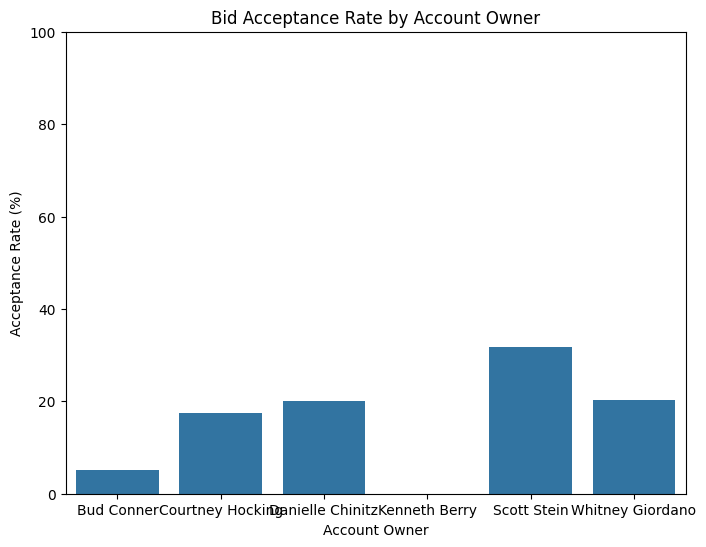


Contingency Table (Counts of Accepted and Rejected Bids):
Label               0    1
Account Owner             
Bud Conner        244   13
Courtney Hocking  612  129
Danielle Chinitz  408  103
Kenneth Berry      55    0
Scott Stein        41   19
Whitney Giordano  626  160

Chi-Square Test Results:
Chi2 Statistic: 54.26312301125747
p-value: 1.85042101702944e-10
Degrees of Freedom: 5
Expected Frequencies:
[[211.78506224  45.21493776]
 [610.63319502 130.36680498]
 [421.09792531  89.90207469]
 [ 45.32365145   9.67634855]
 [ 49.4439834   10.5560166 ]
 [647.71618257 138.28381743]]


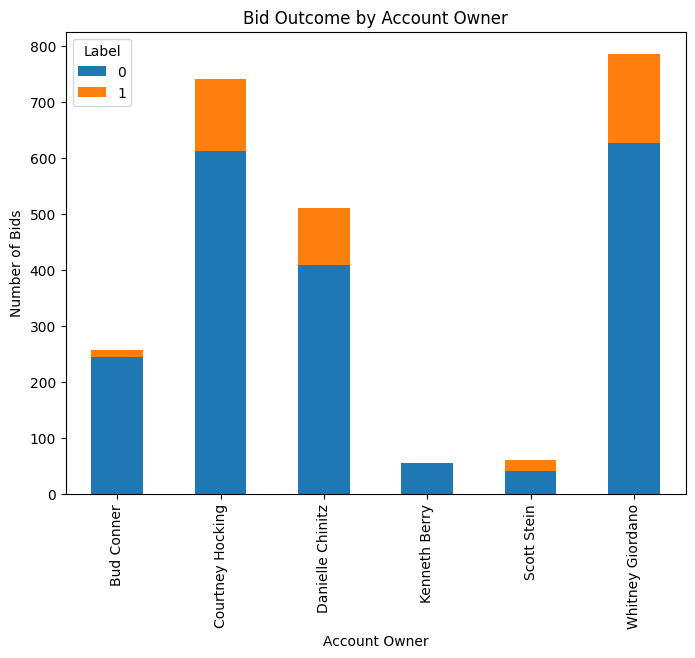

         Current function value: 0.450402
         Iterations: 35

Logistic Regression Summary:
                           Logit Regression Results                           
Dep. Variable:                  Label   No. Observations:                 2410
Model:                          Logit   Df Residuals:                     2404
Method:                           MLE   Df Model:                            5
Date:                Mon, 31 Mar 2025   Pseudo R-squ.:                 0.03175
Time:                        09:09:10   Log-Likelihood:                -1085.5
converged:                      False   LL-Null:                       -1121.1
Covariance Type:            nonrobust   LLR p-value:                 5.804e-14
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.9322      0.285    -10.301      0.000

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import statsmodels.api as sm

# --- Step 0: Load your DataFrame ---
# For example, if you're loading from a CSV, uncomment and adjust the next line:
# df_clean = pd.read_csv("path_to_your_file.csv")

# --- Step 1: Calculate Acceptance Rates by Account Owner ---
acceptance_rates = df_clean.groupby("Account Owner")["Label"].mean() * 100
print("Acceptance Rates by Account Owner:")
print(acceptance_rates)

# --- Step 2: Visualize Acceptance Rates ---
plt.figure(figsize=(8, 6))
sns.barplot(x=acceptance_rates.index, y=acceptance_rates.values)
plt.ylabel("Acceptance Rate (%)")
plt.title("Bid Acceptance Rate by Account Owner")
plt.ylim(0, 100)  # y-axis from 0 to 100%
plt.show()

# --- Step 3: Create a Contingency Table ---
contingency_table = pd.crosstab(df_clean["Account Owner"], df_clean["Label"])
print("\nContingency Table (Counts of Accepted and Rejected Bids):")
print(contingency_table)

# --- Step 4: Perform Chi-Square Test for Independence ---
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nChi-Square Test Results:")
print("Chi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

# --- Step 5: Visualize the Contingency Table ---
contingency_table.plot(kind="bar", stacked=True, figsize=(8, 6))
plt.ylabel("Number of Bids")
plt.title("Bid Outcome by Account Owner")
plt.show()

# --- Step 6: Logistic Regression ---
# Convert the 'Account Owner' column into dummy variables.
df_logit = pd.get_dummies(df_clean, columns=["Account Owner"], drop_first=True)

# Define independent (X) and dependent (y) variables.
X = df_logit.filter(regex="Account Owner_")
y = df_logit["Label"]

# Convert to numeric types in case they are object types.
X = X.astype(float)
y = y.astype(float)

# Add a constant to the independent variables.
X = sm.add_constant(X)

# Fit the logistic regression model.
logit_model = sm.Logit(y, X)
result = logit_model.fit()

print("\nLogistic Regression Summary:")
print(result.summary())

